In [43]:
import numpy as np
from scipy.integrate import solve_bvp
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
def Main(ode, x0, xN, fL, fR):
    sns.set_palette("pastel")
    plt.figure(figsize=(10, 6))  

    def boundary_conditions(ya, yb):
        return np.array([ya[0] - fL, yb[0] - fR])  

    for epsilon in [0.1, 0.01, 0.001]:
        x_guess = np.linspace(x0, xN, 100)  #
        y_guess = np.zeros((2, x_guess.size))  
        y_guess[0] = x_guess  

        solution = solve_bvp(ode(epsilon), boundary_conditions, x_guess, y_guess)

        x_fine = np.linspace(x0, xN, 500)
        y_fine = solution.sol(x_fine)

        sns.lineplot(x=x_fine, y=y_fine[0], label=rf"$f(x)$: $\epsilon = {epsilon}$", linewidth=2.5)

    #Labeling
    plt.xlabel(r"$x$", fontsize=14)
    plt.ylabel(r"$f(x)$", fontsize=14)
    plt.title("Numerical Solution", fontsize=16)
    plt.legend(fontsize=12)
    plt.show()

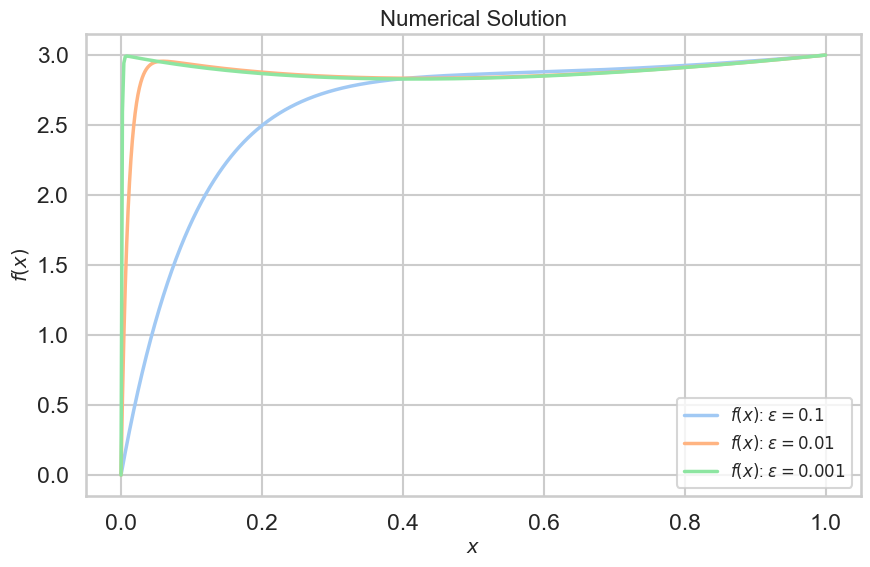

In [ ]:
if __name__ == "__main__":
    #PARAMETERS
    x0, xN = 0, 1  # Define the domain boundaries
    fL, fR = 0, 3 # f(0) = 1, f(L) = 3


    def ode(epsilon):
        def system(x, y):
            f = y[0]
            df_dx = y[1]
            d2f_dx2 = (2 - df_dx - f / (x + 1)) / epsilon #ONLY CHANGE HERE
            return np.vstack((df_dx, d2f_dx2))
        return system



    Main(ode, x0, xN, fL, fR)
